In [1]:
import numpy as np
import tensorflow as tf
import random as rn
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
print(tf. __version__)

2.5.1


In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [42]:
train_images.shape

(60000, 28, 28)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

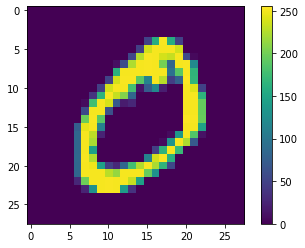

In [16]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False);

In [18]:
train_labels[1]

0

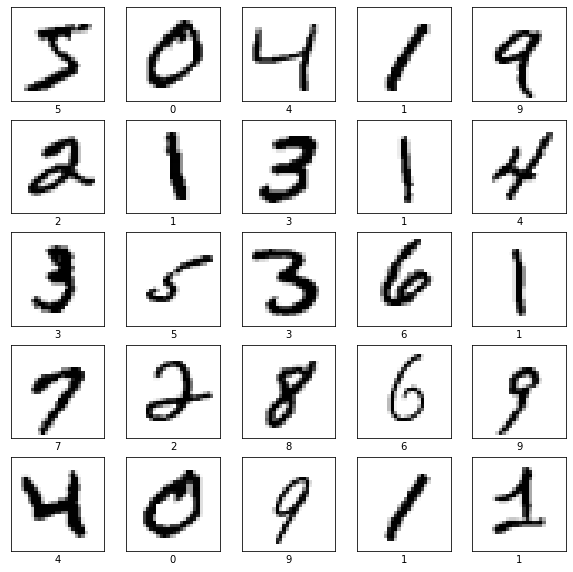

In [21]:
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap =plt.cm.binary)
  plt.xlabel(train_labels[i]);

# Preparing the Data

In [4]:
'''
Pre-Process the data by changing the shape of Input(train_images and test_images)
We have the dimension of train_images as (60000,28,28)
    - Each input is of shape(28,28)
          But to be able to use it in our Neural network as input, we have to convert
      into a single long vector, so that it can be used as reference for input shape
      for neural network
      
 This Process is known as Flattening
 
 So We convert to --> in the form of (60000, 28*28) from (60000,28,28)  and (10000,28*28) from (10000,28,28)
 for train_images and test_images respectively


'''
train_images = train_images.reshape((60000,28*28))
test_images = test_images.reshape((10000,28*28))

In [23]:
(train_images.shape), (test_images.shape)

((60000, 784), (10000, 784))

In [24]:
train_images[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [5]:
'''
Scaling the values in the input between 0 and 1.
Currently input values range between 0 to 255
'''
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [45]:
train_images[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

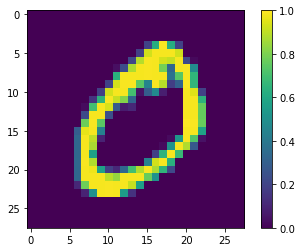

In [31]:
# lets see if this scaling has had a bad impact on our plot
plt.figure()
plt.imshow(train_images[1].reshape(28,28)) # Reshape Because we had flattened it earlier
plt.colorbar()
plt.grid(False)

### One Hot Encoding

In [32]:
#To convert the values to one-hot encoding vectors we have an inbuilt function called to_categorical

In [6]:
from tensorflow.keras.utils import to_categorical

In [34]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [48]:
train_labels.shape
#fhmti 3ocharyat

(60000, 10)

In [49]:
train_labels[1]
# donc train_labels[1] = 0 7int l 1 f 0

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Building the network

In [18]:
#Making the code results reproducible
from tensorflow.keras.models import Sequential 
np.random.seed(42)
rn.seed(12345)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,
                              inter_op_parallelism_threads=1)
from tensorflow.keras import backend as K

tf.random.set_seed(1234)

sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

In [19]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses

In [20]:
network = models.Sequential()
network.add(layers.Dense(256,activation = 'relu',input_shape = (train_images.shape[1],)))
network.add(layers.Dense(256,activation = 'relu'))
network.add(layers.Dense(10,activation = 'softmax'))

In [21]:
#Configuring the Network
network.compile(optimizer = optimizers.RMSprop(),
               loss = losses.categorical_crossentropy,
               metrics = ['accuracy'])

In [22]:
#Separating the Training set and Validation set
x_val = train_images[:10000]
x_partial_train = train_images[10000:]
y_val = train_labels[:10000]
y_partial_train = train_labels[10000:]

In [23]:
x_val.shape,x_partial_train.shape

((10000, 784), (50000, 784))

In [24]:
y_val.shape,y_partial_train.shape

((10000, 10), (50000, 10))

In [25]:
#Perform the fit
network.fit(x_partial_train,
           y_partial_train,
           epochs = 10,
           batch_size = 128,
           validation_data = (x_val,y_val))

Epoch 1/10
391/391 [==============================] - 5s 11ms/step - loss: 0.2740 - accuracy: 0.9166 - val_loss: 0.1361 - val_accuracy: 0.9593
Epoch 2/10
391/391 [==============================] - 4s 9ms/step - loss: 0.1043 - accuracy: 0.9687 - val_loss: 0.0933 - val_accuracy: 0.9694
Epoch 3/10
391/391 [==============================] - 4s 10ms/step - loss: 0.0680 - accuracy: 0.9792 - val_loss: 0.0998 - val_accuracy: 0.9690
Epoch 4/10
391/391 [==============================] - 4s 10ms/step - loss: 0.0483 - accuracy: 0.9848 - val_loss: 0.0849 - val_accuracy: 0.9770
Epoch 5/10
391/391 [==============================] - 4s 10ms/step - loss: 0.0364 - accuracy: 0.9888 - val_loss: 0.0883 - val_accuracy: 0.9759
Epoch 6/10
391/391 [==============================] - 4s 10ms/step - loss: 0.0279 - accuracy: 0.9910 - val_loss: 0.0959 - val_accuracy: 0.9748
Epoch 7/10
391/391 [==============================] - 4s 10ms/step - loss: 0.0216 - accuracy: 0.9931 - val_loss: 0.0848 - val_accuracy: 0.9802


In [26]:
test_loss, test_acc = network.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0958 - accuracy: 0.9798


In [27]:
test_loss

0.095801942050457

In [28]:
test_acc

0.9797999858856201